In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt


In [18]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [19]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [21]:
Base.classes.keys()

['measurement', 'station']

In [22]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [23]:
session = Session(engine)

In [28]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [55]:
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [45]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [46]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date

sel = [Measurement.prcp, 
       Measurement.date]
precip = session.query(*sel).\
    filter(Measurement.date > '2016-08-23').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
precip

[(0.08, '2016-08-01'),
 (0.05, '2016-08-02'),
 (0.0, '2016-08-03'),
 (0.04, '2016-08-04'),
 (0.01, '2016-08-05'),
 (0.0, '2016-08-06'),
 (0.39, '2016-08-07'),
 (0.02, '2016-08-08'),
 (0.0, '2016-08-09'),
 (0.0, '2016-08-10'),
 (0.0, '2016-08-11'),
 (0.0, '2016-08-12'),
 (0.0, '2016-08-13'),
 (0.0, '2016-08-14'),
 (0.0, '2016-08-15'),
 (0.0, '2016-08-16'),
 (0.0, '2016-08-17'),
 (0.0, '2016-08-18'),
 (0.04, '2016-08-19'),
 (0.0, '2016-08-20'),
 (0.12, '2016-08-21'),
 (0.4, '2016-08-22'),
 (0.0, '2016-08-23'),
 (0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016

In [76]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Prcp = pd.DataFrame(precip, columns=['Precipitation', 'Date'])
Prcp.Date = pd.to_datetime(Prcp['Date'])

#dt.date.today().strftime("%d")
Prcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 2 columns):
Precipitation    386 non-null float64
Date             388 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.1 KB


In [88]:
#Prcp.Date.strftime("%d")
Prcp['mnth_yr'] = Prcp['Date'].apply(lambda x: x.strftime('%Y-%m'))


In [90]:
a=Prcp.groupby("mnth_yr").sum().sort_values("mnth_yr")
a

,Precipitation
mnth_yr,
2016-08,1.45
2016-09,2.13
2016-10,0.52
2016-11,0.73
2016-12,1.75
2017-01,0.41
2017-02,3.68
2017-03,2.76
2017-04,1.95


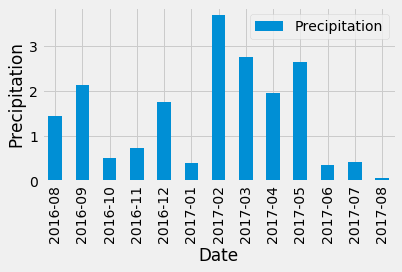

In [91]:
# Use Pandas Plotting with Matplotlib to plot the data
a.plot.bar()
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.tight_layout()
plt.show()

In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Prcp.describe()

,Precipitation
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [92]:
# Design a query to show how many stations are available in this dataset?
session.query(func.distinct(Measurement.station)).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [103]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel=[session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()]
sel


[[('USC00519281', 2772),
  ('USC00519397', 2724),
  ('USC00513117', 2709),
  ('USC00519523', 2669),
  ('USC00516128', 2612),
  ('USC00514830', 2202),
  ('USC00511918', 1979),
  ('USC00517948', 1372),
  ('USC00518838', 511)]]

In [106]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [Measurement.station, 
       func.max(Measurement.tobs), 
       func.min(Measurement.tobs), 
       func.avg(Measurement.tobs),
       func.count(Measurement.station)]
station_averages = session.query(*sel).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_averages

[('USC00519281', 85.0, 54.0, 71.66378066378067, 2772),
 ('USC00519397', 87.0, 56.0, 74.55323054331865, 2724),
 ('USC00513117', 85.0, 59.0, 72.68918420081211, 2709),
 ('USC00519523', 85.0, 56.0, 74.5436493068565, 2669),
 ('USC00516128', 84.0, 58.0, 70.91500765696784, 2612),
 ('USC00514830', 85.0, 58.0, 74.8732970027248, 2202),
 ('USC00511918', 87.0, 53.0, 71.61596766043456, 1979),
 ('USC00517948', 87.0, 58.0, 74.68440233236151, 1372),
 ('USC00518838', 83.0, 58.0, 72.72407045009784, 511)]

In [109]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
usc=session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date > '2016-08-23').all()
usc

[('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [112]:
usc1=pd.DataFrame(usc, columns=['Station', 'Temp_Obs'])
usc1

,Station,Temp_Obs
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0
5,USC00519281,78.0
6,USC00519281,77.0
7,USC00519281,78.0
8,USC00519281,80.0
9,USC00519281,80.0


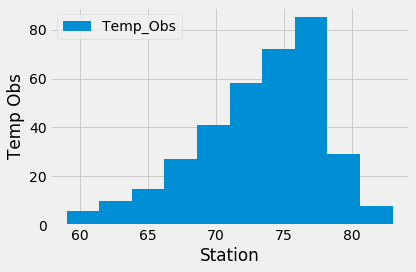

In [113]:
usc1.plot.hist()
plt.xlabel("Station")
plt.ylabel("Temp Obs")
plt.tight_layout()
plt.show()

In [114]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-02-28', '2016-03-05'))

[(62.0, 69.88636363636364, 80.0)]


In [117]:
query_date = dt.date(2016, 2, 28) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2015-02-28


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)